In [18]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
API_Key = "Llt7CnrNDx3CpyrDxfjmNlWXI"
API_Key_Secret = "xCLbVJ6YHMF8tTxouabwPPWPFvbHPZBStOFAMV546gQUZ6BWFf"
Bearer_Token = "AAAAAAAAAAAAAAAAAAAAAPuQUAEAAAAA%2FJOKE0KJYrZIDJQuWy3X4Zbi5YM%3Dw8USJBDtbIJiHuE1UIRT37IgyZIUtQIKFBAA7lStRmRjLpZhVr"
Access_Token = "1442726092133920772-KJkSO8iZcq1T9HR39r0ldQYZCSXDdf"
Access_Token_Secret = "K3q9pdzPRnF2Fo2S8PLK0SP8Pvde3JZxLQ8P7Hb61fodp"

In [4]:
print(API_Key)
print(API_Key_Secret)
print(Bearer_Token)
print(Access_Token)
print(Access_Token_Secret)

Llt7CnrNDx3CpyrDxfjmNlWXI
xCLbVJ6YHMF8tTxouabwPPWPFvbHPZBStOFAMV546gQUZ6BWFf
AAAAAAAAAAAAAAAAAAAAAPuQUAEAAAAA%2FJOKE0KJYrZIDJQuWy3X4Zbi5YM%3Dw8USJBDtbIJiHuE1UIRT37IgyZIUtQIKFBAA7lStRmRjLpZhVr
1442726092133920772-KJkSO8iZcq1T9HR39r0ldQYZCSXDdf
K3q9pdzPRnF2Fo2S8PLK0SP8Pvde3JZxLQ8P7Hb61fodp


In [5]:
authenticate = tweepy.OAuthHandler(API_Key,API_Key_Secret)
authenticate.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(authenticate,wait_on_rate_limit=True)

In [203]:
posts = api.user_timeline(screen_name = "RNTata2000", count=150, tweet_mode="extended")

In [204]:
i = 1
for p in posts[0:5]:
    print(i,')',p.full_text,"\n")
    i=i+1

1 ) Congratulations to Airbus Defence, Tata Advanced Systems Limited and the Indian Defence Ministry 🤝 @tataadvanced @indiandefence @AirbusDefence @TataCompanies https://t.co/3pNvA4slMR 

2 ) https://t.co/lPeskCkt1r 

3 ) https://t.co/CjAR6LzIah 

4 ) Very thankful to have gotten my first vaccination shot today. It was effortless and painless. I truly hope everyone can be immunised and protected soon. 

5 ) My best wishes to all the Tata group companies, the employees &amp; their families on the birth anniversary of our founder, Mr. Jamsetji Tata, who has inspired us with his kindness over the years.

This founder’s day has special emotions for me, reminding me of my mentor Mr. JRD Tata https://t.co/GUZCqj9ESk 



In [205]:
df  = pd.DataFrame([t.full_text for t in posts],columns=['Tweets'])

In [206]:
df.head()

,Tweets
0,"Congratulations to Airbus Defence, Tata Advanc..."
1,https://t.co/lPeskCkt1r
2,https://t.co/CjAR6LzIah
3,Very thankful to have gotten my first vaccinat...
4,My best wishes to all the Tata group companies...


In [207]:
def clean_txt(text):
    text = re.sub(r"@[A-Za-z0-9]+","",text) # removes @mentions
    text = re.sub(r"#","",text) # removes #
    text = re.sub(r"RT[\s]+","",text) # removes RT re tweet followed by \s-blank spaces
    text = re.sub(r"https?:\/\/\S+","",text) # removes hyperlink
    
    return text

df['Tweets'] = df['Tweets'].apply(clean_txt)    

In [208]:
df['Tweets'][2]

''

In [209]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [210]:
df.head()

,Tweets,Subjectivity,Polarity
0,"Congratulations to Airbus Defence, Tata Advanc...",0.371429,0.164286
1,,0.000000,0.000000
2,,0.000000,0.000000
3,Very thankful to have gotten my first vaccinat...,0.316667,0.225000
4,My best wishes to all the Tata group companies...,0.435714,0.678571


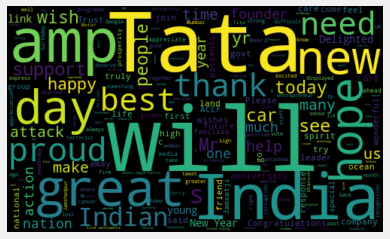

<Figure size 432x288 with 0 Axes>

In [211]:
all_words = " ".join([twts for twts in df['Tweets']])
word_cloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(all_words)
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis('off')
plt.show()
plt.savefig('WorldCloud.png')

In [212]:
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [213]:
df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,"Congratulations to Airbus Defence, Tata Advanc...",0.371429,0.164286,Positive
1,,0.000000,0.000000,Neutral
2,,0.000000,0.000000,Neutral
3,Very thankful to have gotten my first vaccinat...,0.316667,0.225000,Positive
4,My best wishes to all the Tata group companies...,0.435714,0.678571,Positive


In [214]:
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Positive'):
        print(str(j) + ')'+sortedDF['Tweets'][i])
        print()
        j=j+1

1)Congratulations to Airbus Defence, Tata Advanced Systems Limited and the Indian Defence Ministry 🤝     

2)Very thankful to have gotten my first vaccination shot today. It was effortless and painless. I truly hope everyone can be immunised and protected soon.

3)My best wishes to all the Tata group companies, the employees &amp; their families on the birth anniversary of our founder, Mr. Jamsetji Tata, who has inspired us with his kindness over the years.

This founder’s day has special emotions for me, reminding me of my mentor Mr. JRD Tata 

4)While I appreciate the sentiments expressed by a section of the social media in terms of an award, I would humbly like to request that such campaigns be discontinued. 

Instead, I consider myself fortunate to be an Indian and to try and contribute to India’s growth and prosperity 

5)Congratulations on the 4 million milestone! I wish you all the very best for the road ahead.

 _Cars 



6): Celebrating the spirit of self-reliance, we are prou

In [215]:
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Negative'):
        print(str(j) + ')'+sortedDF['Tweets'][i])
        print()
        j=j+1

1)In past difficult times, entrepreneurs have displayed far sightedness and creativity that could not have been believed to exist. These became the flagpoles of innovation and new technology today. Read at  

2)I’m afraid this too, has not been said by me. I will endeavour to call out fake news whenever I can, but would encourage you to always verify news sources. My picture alongside a quote does not guarantee me having said it, a problem that many people face. 

3)A lot has been said about the tragedy of 26/11. The memory of the carnage and loss of life, is still painful. We won't forget the needless suffering caused across the city. But we remain proud of the spirit and the sense of unity of Mumbai. We can be hurt, but not knocked out. 

4)Always feel nostalgic and inspired when in Jamshedpur... Founder’s Day is always special. 

5)Shocked my a/c was hacked yesterday &amp; spurious tweet sent with malicious intent.Tweet deleted, a/c restored. C link. 

6)My heart goes out to those o

In [216]:
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Neutral'):
        print(str(j) + ')'+sortedDF['Tweets'][i])
        print()
        j=j+1

1)

2)

3)

4)

5)In the spirit of solidarity 

6)The crowd of people on launch day showed that it wasn’t just about the coffee, but also about relationships. Wishing  a Venti-hearted 7 year anniversary month since the inception of Tata-Starbucks with the vision of of Mr. R. K Krishnakumar and Mr. Howard Schultz. 

7) and swachhbharat 

The Tata Trusts fully support Swachhata Hi Seva. We will do a cleanliness drive on 15th September. 

8): 3/4 ACCF has also started cancer screening programme in the districts along with palliative care strengthening. I am sure…

9): 1/4 Yesterday, I chaired Board of Directors' meeting of Assam Cancer Care Foundation (ACCF). ACCF has started implementat…

10)_India: Under the Rashtriya POSHANAbhiyaan we have decided to increase the annual rate of reduction of anaemia from 1 to 3%. In thi…

11)The attached tweet could help fulfill a design to feed 1 billion people. Please see attached. 

12)Celebrating birthdate of founder Jamsetji Tata. His vision of ind

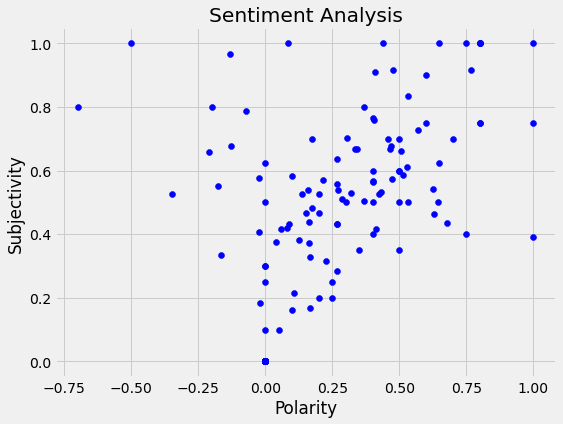

<Figure size 432x288 with 0 Axes>

In [217]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color="Blue")
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()
plt.savefig('ScatterPlot.png')

In [218]:
print("Positive Tweets: ",round((df[df.Analysis=='Positive'].shape[0]/df.shape[0])*100))
print("Neutral Tweets : ",round((df[df.Analysis=='Neutral'].shape[0]/df.shape[0])*100))
print("Negative Tweets: ",round((df[df.Analysis=='Negative'].shape[0]/df.shape[0])*100))

Positive Tweets:  60
Neutral Tweets :  31
Negative Tweets:  9


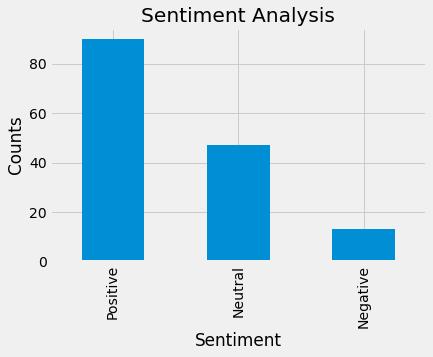

<Figure size 432x288 with 0 Axes>

In [219]:
df['Analysis'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()
plt.savefig('BarPlot.png')